# Antes de começar, é importante destacar que há um certo viés de seleção, já que as pessoas que responderam são, na maioria, pessoas que conhecem os integrantes do grupo.

# Também precisamos comentar que não atingimos nossa meta de 272 pessoas para o número de amostragem. Até agora, tivemos apenas 153 respostas.

# Importando os dados

In [ ]:
import pandas as pd

df = pd.read_excel("Festival Alfa (respostas).xlsx")
df

,Carimbo de data/hora,Qual sua idade?,Qual sua Região Administrativa?,Você se interessa por causas sociais?,Você foi em algum festival nos últimos 4 anos?,Tem interesse em ir a algum festival?,Pagaria até quanto no ingresso para dois dias?,"Você iria em atividades diurnas ?\n(Circo, Teatro, etc)",E noturnas ?\n(Shows),Qual seria o melhor local?
0,2022-09-10 10:32:50.640,18.0,Paranoá,Sim,Não,Sim,Até R$200,Sim,Nâo,Estacionamento do Mané Garrincha
1,2022-09-10 10:39:13.565,18.0,Itapoã,Sim,Não,Sim,Até R$200,Sim,Sim,Estacionamento do Mané Garrincha
2,2022-09-10 10:41:07.244,17.0,Paranoá,Sim,Não,Sim,Até R$200,Sim,Nâo,Parque da Cidade
3,2022-09-10 11:22:28.348,18.0,Paranoá,Sim,Sim,Sim,Até R$200,Sim,Sim,Estacionamento do Mané Garrincha
4,2022-09-10 11:33:25.950,18.0,Itapoã,Sim,Não,Sim,Até R$200,Não,Sim,Setor de Clubes Sul
...,...,...,...,...,...,...,...,...,...,...
148,2022-09-13 19:45:17.808,55.0,Sol Nascente/Pôr do So,Não,Não,Não,Até R$200,Não,Nâo,Parque da Cidade
149,2022-09-13 20:05:38.820,31.0,Sudoeste/Octogonal,Sim,Sim,Sim,Até R$200,Não,Sim,Estacionamento do Mané Garrincha
150,2022-09-14 21:07:41.727,18.0,Plano Piloto,Sim,Não,Sim,Até R$200,Não,Sim,Estacionamento do Mané Garrincha
151,2022-09-14 21:08:25.426,19.0,Plano Piloto,Sim,Não,Sim,Até R$200,Não,Sim,Estacionamento do Mané Garrincha


# Mudando os nomes das colunas
### Isso deixa os dados mais fáceis de serem trabalhados

In [ ]:
df.columns = ["data", "idade", "região_administrativa",
              "interesse_causas_sociais", "festivais",
              "interesse_festivais", "valor_ingresso (R$)",
              "atividades_diurnas", "atividades_noturnas",
              "local"]
df

,data,idade,região_administrativa,interesse_causas_sociais,festivais,interesse_festivais,valor_ingresso (R$),atividades_diurnas,atividades_noturnas,local
0,2022-09-10 10:32:50.640,18.0,Paranoá,Sim,Não,Sim,Até R$200,Sim,Nâo,Estacionamento do Mané Garrincha
1,2022-09-10 10:39:13.565,18.0,Itapoã,Sim,Não,Sim,Até R$200,Sim,Sim,Estacionamento do Mané Garrincha
2,2022-09-10 10:41:07.244,17.0,Paranoá,Sim,Não,Sim,Até R$200,Sim,Nâo,Parque da Cidade
3,2022-09-10 11:22:28.348,18.0,Paranoá,Sim,Sim,Sim,Até R$200,Sim,Sim,Estacionamento do Mané Garrincha
4,2022-09-10 11:33:25.950,18.0,Itapoã,Sim,Não,Sim,Até R$200,Não,Sim,Setor de Clubes Sul
...,...,...,...,...,...,...,...,...,...,...
148,2022-09-13 19:45:17.808,55.0,Sol Nascente/Pôr do So,Não,Não,Não,Até R$200,Não,Nâo,Parque da Cidade
149,2022-09-13 20:05:38.820,31.0,Sudoeste/Octogonal,Sim,Sim,Sim,Até R$200,Não,Sim,Estacionamento do Mané Garrincha
150,2022-09-14 21:07:41.727,18.0,Plano Piloto,Sim,Não,Sim,Até R$200,Não,Sim,Estacionamento do Mané Garrincha
151,2022-09-14 21:08:25.426,19.0,Plano Piloto,Sim,Não,Sim,Até R$200,Não,Sim,Estacionamento do Mané Garrincha


# Modificando os dados da coluna com o valor dos ingressos para números

In [ ]:
def convert_part1():
    """
    Changes the strings in the 'valor_ingresso (R$)' to
    a list, separating at the '$', then excludes the first
    element of the list.
    
    Returns
    ---------
    df: the original DataFrame object, with the values
    in the 'valor_ingresso (R$)' column modified to be
    lists containing a single string.
    """
    money_int = []
    for item in df["valor_ingresso (R$)"]:
        sep = item.split(sep="$")
        del sep[0]
        money_int.append(sep)
    df["valor_ingresso (R$)"] = money_int
    return df

df = convert_part1()
df

,data,idade,região_administrativa,interesse_causas_sociais,festivais,interesse_festivais,valor_ingresso (R$),atividades_diurnas,atividades_noturnas,local
0,2022-09-10 10:32:50.640,18.0,Paranoá,Sim,Não,Sim,[200],Sim,Nâo,Estacionamento do Mané Garrincha
1,2022-09-10 10:39:13.565,18.0,Itapoã,Sim,Não,Sim,[200],Sim,Sim,Estacionamento do Mané Garrincha
2,2022-09-10 10:41:07.244,17.0,Paranoá,Sim,Não,Sim,[200],Sim,Nâo,Parque da Cidade
3,2022-09-10 11:22:28.348,18.0,Paranoá,Sim,Sim,Sim,[200],Sim,Sim,Estacionamento do Mané Garrincha
4,2022-09-10 11:33:25.950,18.0,Itapoã,Sim,Não,Sim,[200],Não,Sim,Setor de Clubes Sul
...,...,...,...,...,...,...,...,...,...,...
148,2022-09-13 19:45:17.808,55.0,Sol Nascente/Pôr do So,Não,Não,Não,[200],Não,Nâo,Parque da Cidade
149,2022-09-13 20:05:38.820,31.0,Sudoeste/Octogonal,Sim,Sim,Sim,[200],Não,Sim,Estacionamento do Mané Garrincha
150,2022-09-14 21:07:41.727,18.0,Plano Piloto,Sim,Não,Sim,[200],Não,Sim,Estacionamento do Mané Garrincha
151,2022-09-14 21:08:25.426,19.0,Plano Piloto,Sim,Não,Sim,[200],Não,Sim,Estacionamento do Mané Garrincha


In [ ]:
def convert_part2():
    """
    Takes the lists containing strings in the
    'valor_ingresso (R$)' column and extracts them
    from the lists, then turns them into integers,
    and inserts them back into the DataFrame as such.
    
    Returns
    --------
    df: the original DataFrame object, with the values
    in the 'valor_ingresso (R$)' column modified to be
    integers.
    """
    money = []
    for item in df["valor_ingresso (R$)"]:
        value = item[0]
        new = int(value)
        money.append(new)
    df["valor_ingresso (R$)"] = money
    return df

df = convert_part2()
df

,data,idade,região_administrativa,interesse_causas_sociais,festivais,interesse_festivais,valor_ingresso (R$),atividades_diurnas,atividades_noturnas,local
0,2022-09-10 10:32:50.640,18.0,Paranoá,Sim,Não,Sim,200,Sim,Nâo,Estacionamento do Mané Garrincha
1,2022-09-10 10:39:13.565,18.0,Itapoã,Sim,Não,Sim,200,Sim,Sim,Estacionamento do Mané Garrincha
2,2022-09-10 10:41:07.244,17.0,Paranoá,Sim,Não,Sim,200,Sim,Nâo,Parque da Cidade
3,2022-09-10 11:22:28.348,18.0,Paranoá,Sim,Sim,Sim,200,Sim,Sim,Estacionamento do Mané Garrincha
4,2022-09-10 11:33:25.950,18.0,Itapoã,Sim,Não,Sim,200,Não,Sim,Setor de Clubes Sul
...,...,...,...,...,...,...,...,...,...,...
148,2022-09-13 19:45:17.808,55.0,Sol Nascente/Pôr do So,Não,Não,Não,200,Não,Nâo,Parque da Cidade
149,2022-09-13 20:05:38.820,31.0,Sudoeste/Octogonal,Sim,Sim,Sim,200,Não,Sim,Estacionamento do Mané Garrincha
150,2022-09-14 21:07:41.727,18.0,Plano Piloto,Sim,Não,Sim,200,Não,Sim,Estacionamento do Mané Garrincha
151,2022-09-14 21:08:25.426,19.0,Plano Piloto,Sim,Não,Sim,200,Não,Sim,Estacionamento do Mané Garrincha


# Corrigindo o erro de digitação para as repostas na coluna atividades_noturnas

In [ ]:
s = "Sim"
n = "Não"

nope = []
for item in df["atividades_noturnas"]:
    checking = item.split()
    if "Sim" in checking:
        nope.append(s)
    else:
        nope.append(n)
df["atividades_noturnas"] = nope
df

,data,idade,região_administrativa,interesse_causas_sociais,festivais,interesse_festivais,valor_ingresso (R$),atividades_diurnas,atividades_noturnas,local
0,2022-09-10 10:32:50.640,18.0,Paranoá,Sim,Não,Sim,200,Sim,Não,Estacionamento do Mané Garrincha
1,2022-09-10 10:39:13.565,18.0,Itapoã,Sim,Não,Sim,200,Sim,Sim,Estacionamento do Mané Garrincha
2,2022-09-10 10:41:07.244,17.0,Paranoá,Sim,Não,Sim,200,Sim,Não,Parque da Cidade
3,2022-09-10 11:22:28.348,18.0,Paranoá,Sim,Sim,Sim,200,Sim,Sim,Estacionamento do Mané Garrincha
4,2022-09-10 11:33:25.950,18.0,Itapoã,Sim,Não,Sim,200,Não,Sim,Setor de Clubes Sul
...,...,...,...,...,...,...,...,...,...,...
148,2022-09-13 19:45:17.808,55.0,Sol Nascente/Pôr do So,Não,Não,Não,200,Não,Não,Parque da Cidade
149,2022-09-13 20:05:38.820,31.0,Sudoeste/Octogonal,Sim,Sim,Sim,200,Não,Sim,Estacionamento do Mané Garrincha
150,2022-09-14 21:07:41.727,18.0,Plano Piloto,Sim,Não,Sim,200,Não,Sim,Estacionamento do Mané Garrincha
151,2022-09-14 21:08:25.426,19.0,Plano Piloto,Sim,Não,Sim,200,Não,Sim,Estacionamento do Mané Garrincha


## Adicionando uma coluna para saber quem tem interesse em atividades nos dois turnos

In [ ]:
nova_coluna = []
for i in range(0,len(df)):
    if df["atividades_diurnas"][i] != "Sim" or df["atividades_noturnas"][i] != "Sim":
        nova_coluna.append(n)
    else:
        nova_coluna.append(s)
df["atividades_ambos_turnos"] = nova_coluna
df

,data,idade,região_administrativa,interesse_causas_sociais,festivais,interesse_festivais,valor_ingresso (R$),atividades_diurnas,atividades_noturnas,local,atividades_ambos_turnos
0,2022-09-10 10:32:50.640,18.0,Paranoá,Sim,Não,Sim,200,Sim,Não,Estacionamento do Mané Garrincha,Não
1,2022-09-10 10:39:13.565,18.0,Itapoã,Sim,Não,Sim,200,Sim,Sim,Estacionamento do Mané Garrincha,Sim
2,2022-09-10 10:41:07.244,17.0,Paranoá,Sim,Não,Sim,200,Sim,Não,Parque da Cidade,Não
3,2022-09-10 11:22:28.348,18.0,Paranoá,Sim,Sim,Sim,200,Sim,Sim,Estacionamento do Mané Garrincha,Sim
4,2022-09-10 11:33:25.950,18.0,Itapoã,Sim,Não,Sim,200,Não,Sim,Setor de Clubes Sul,Não
...,...,...,...,...,...,...,...,...,...,...,...
148,2022-09-13 19:45:17.808,55.0,Sol Nascente/Pôr do So,Não,Não,Não,200,Não,Não,Parque da Cidade,Não
149,2022-09-13 20:05:38.820,31.0,Sudoeste/Octogonal,Sim,Sim,Sim,200,Não,Sim,Estacionamento do Mané Garrincha,Não
150,2022-09-14 21:07:41.727,18.0,Plano Piloto,Sim,Não,Sim,200,Não,Sim,Estacionamento do Mané Garrincha,Não
151,2022-09-14 21:08:25.426,19.0,Plano Piloto,Sim,Não,Sim,200,Não,Sim,Estacionamento do Mané Garrincha,Não


In [ ]:
df["atividades_ambos_turnos"].value_counts()

Sim    113
Não     39
Name: atividades_ambos_turnos, dtype: int64

# Informações demográficas

### Quantas pessoas responderam por região

In [ ]:
df["região_administrativa"].value_counts()

Paranoá                   28
Plano Piloto              27
Itapoã                    23
Jardim Botânico           12
Sobradinho                11
Guará                      6
Águas Claras               5
Lago Sul                   5
Lago Norte                 5
São Sebastião              4
Park Way                   4
Sudoeste/Octogonal         4
Riacho Fundo               2
Arniqueira                 2
Núcleo Bandeirante         2
Taguatinga                 2
Planaltina                 2
Ceilândia                  1
Santa Maria                1
Cruzeiro                   1
Recanto das Emas           1
Vicente Pires              1
Gama                       1
Samambaia                  1
Riacho Fundo 2             1
Sol Nascente/Pôr do So     1
Name: região_administrativa, dtype: int64

### Média e desvio padrão

In [ ]:
df.mean(numeric_only=True)

idade                   26.307190
valor_ingresso (R$)    264.705882
dtype: float64

In [ ]:
df.std(numeric_only=True)

idade                   12.235239
valor_ingresso (R$)    153.670267
dtype: float64

### Quantos votos cada local recebeu

In [ ]:
df["local"].value_counts()

Estacionamento do Mané Garrincha    71
Parque da Cidade                    51
Setor de Clubes Sul                 31
Name: local, dtype: int64

## Há uma correlação entre a idade e o valor do ingresso?

In [ ]:
df.corr()

,idade,valor_ingresso (R$)
idade,1.000000,-0.084122
valor_ingresso (R$),-0.084122,1.000000


#### Podemos ver que não existe nenhuma correlação entre a idade e o valor do ingresso. Aliás, o preço do ingresso tem uma tendência muito pequena a diminuir com a idade.

### Quantas pessoas pagariam por cada valor do ingresso:

In [ ]:
df["valor_ingresso (R$)"].value_counts()

200    127
500     19
800      7
Name: valor_ingresso (R$), dtype: int64

### Quantas pessoas têm interesse em causas sociais:

In [ ]:
df["interesse_causas_sociais"].value_counts()

Sim    141
Não     12
Name: interesse_causas_sociais, dtype: int64

### Preferência em atividades diurnas ou noturnas:

In [ ]:
df["atividades_diurnas"].value_counts()

Sim    127
Não     26
Name: atividades_diurnas, dtype: int64

In [ ]:
df["atividades_noturnas"].value_counts()

Sim    138
Não     15
Name: atividades_noturnas, dtype: int64

# Histogramas

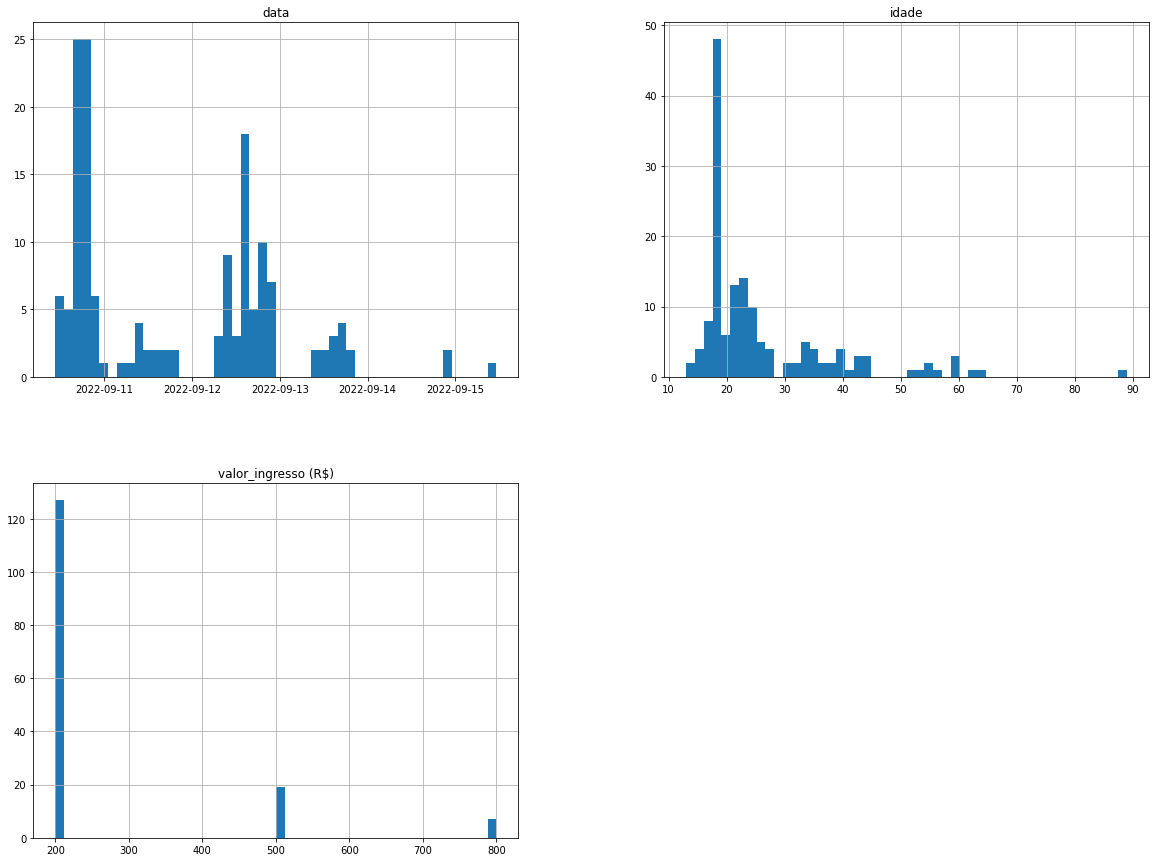

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()

# Valor do ingresso separado por região

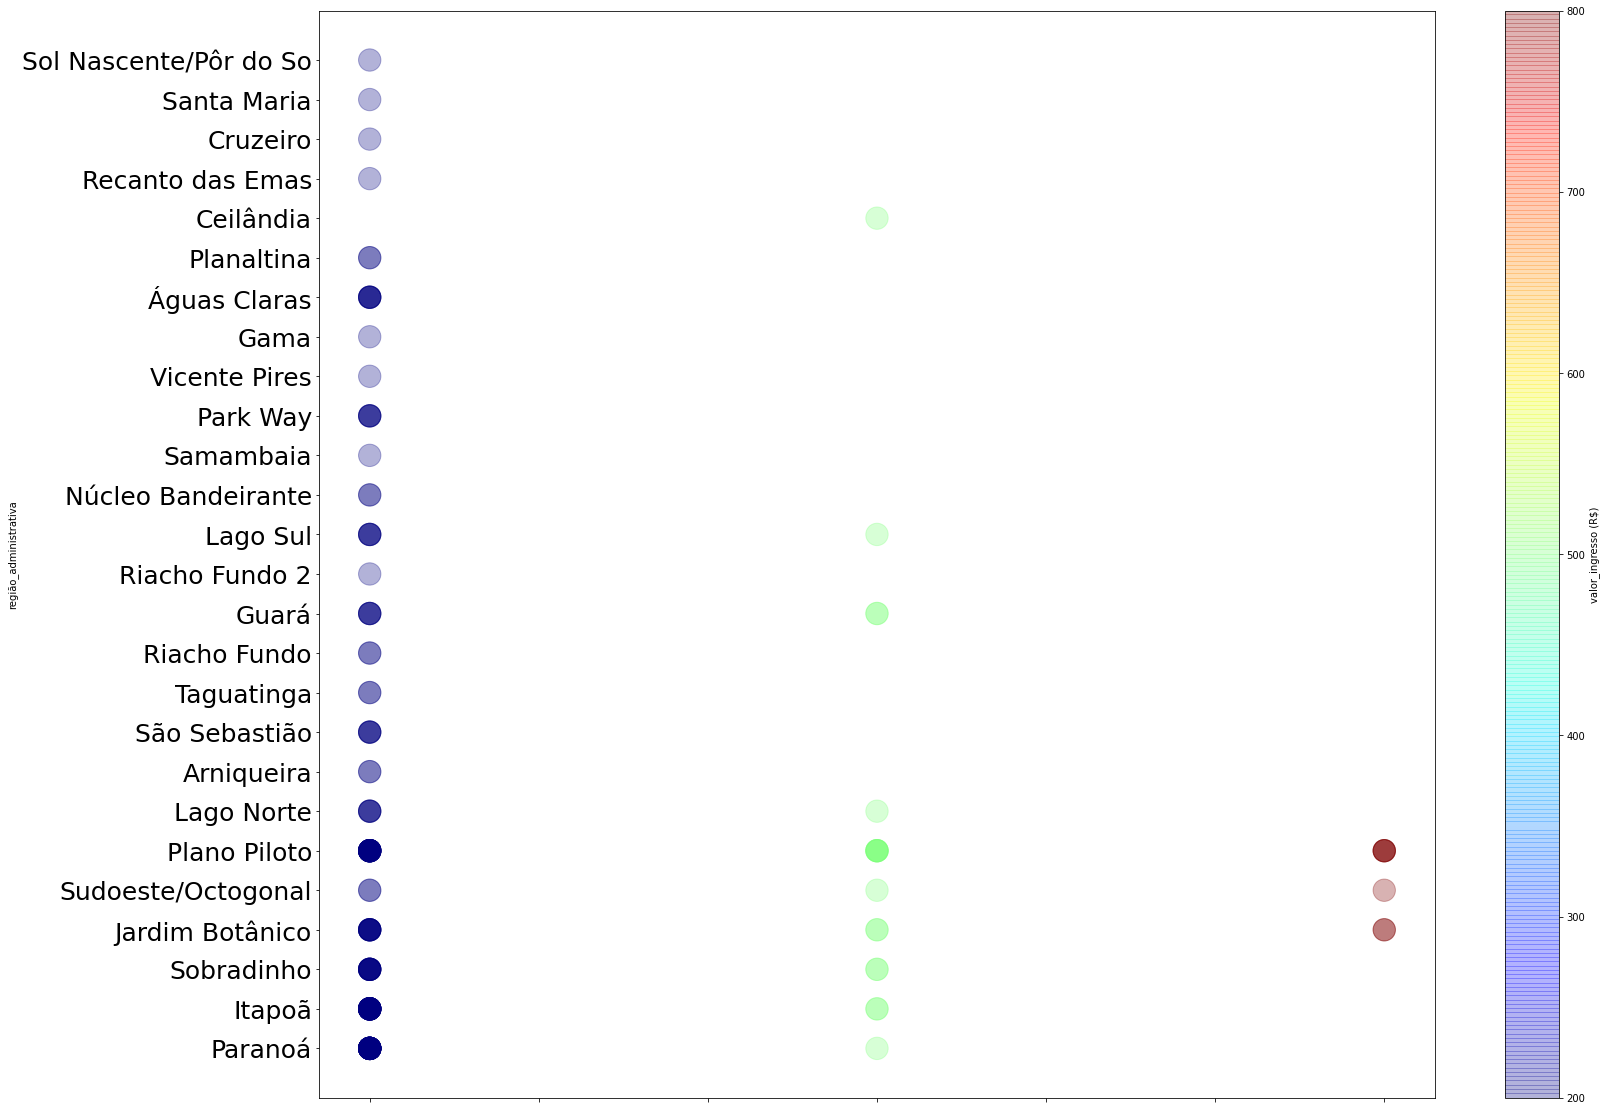

In [ ]:
df.plot(kind="scatter", x="valor_ingresso (R$)",
        y="região_administrativa", alpha=0.3, s=500,
        c="valor_ingresso (R$)", cmap=plt.get_cmap("jet"),
        colorbar=True, figsize=(25,20), fontsize=25)

# Calculando média e desvio padrão separado por região

In [ ]:
def per_region():
    isolated = df.drop_duplicates("região_administrativa")
    for ra in isolated["região_administrativa"]:
        region = df[df["região_administrativa"] == f"{ra}"]
        print(f"Região Administrativa: {ra}\n")
        print("Média:\n", region.mean(numeric_only=True),"\n")
        print("Desvio padrão:\n", region.std(numeric_only=True),
              "\n")
    return

In [ ]:
per_region()

Região Administrativa: Paranoá

Média:
 idade                   27.571429
valor_ingresso (R$)    210.714286
dtype: float64 

Desvio padrão:
 idade                  11.836630
valor_ingresso (R$)    56.694671
dtype: float64 

Região Administrativa: Itapoã

Média:
 idade                   22.695652
valor_ingresso (R$)    226.086957
dtype: float64 

Desvio padrão:
 idade                   7.156909
valor_ingresso (R$)    86.431220
dtype: float64 

Região Administrativa: Sobradinho

Média:
 idade                   24.454545
valor_ingresso (R$)    254.545455
dtype: float64 

Desvio padrão:
 idade                    7.659812
valor_ingresso (R$)    121.355975
dtype: float64 

Região Administrativa: Jardim Botânico

Média:
 idade                   21.166667
valor_ingresso (R$)    350.000000
dtype: float64 

Desvio padrão:
 idade                    3.588703
valor_ingresso (R$)    239.317211
dtype: float64 

Região Administrativa: Sudoeste/Octogonal

Média:
 idade                   30.5
valor_ingr

## Procurando por outliers na idade

<AxesSubplot:>

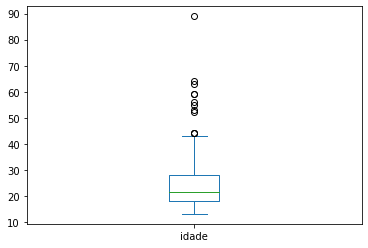

In [ ]:
no_price = df.drop("valor_ingresso (R$)", axis=1)
no_price.plot(kind="box")

# Analisando o comportamento pelo preço que as pessoas pagariam no ingresso

### Separando por preço do ingresso

In [ ]:
duzentos = df[df['valor_ingresso (R$)'] == 200]
duzentos

,data,idade,região_administrativa,interesse_causas_sociais,festivais,interesse_festivais,valor_ingresso (R$),atividades_diurnas,atividades_noturnas,local,atividades_ambos_turnos
0,2022-09-10 10:32:50.640,18.0,Paranoá,Sim,Não,Sim,200,Sim,Não,Estacionamento do Mané Garrincha,Não
1,2022-09-10 10:39:13.565,18.0,Itapoã,Sim,Não,Sim,200,Sim,Sim,Estacionamento do Mané Garrincha,Sim
2,2022-09-10 10:41:07.244,17.0,Paranoá,Sim,Não,Sim,200,Sim,Não,Parque da Cidade,Não
3,2022-09-10 11:22:28.348,18.0,Paranoá,Sim,Sim,Sim,200,Sim,Sim,Estacionamento do Mané Garrincha,Sim
4,2022-09-10 11:33:25.950,18.0,Itapoã,Sim,Não,Sim,200,Não,Sim,Setor de Clubes Sul,Não
...,...,...,...,...,...,...,...,...,...,...,...
147,2022-09-13 18:06:45.629,32.0,Águas Claras,Sim,Não,Sim,200,Não,Sim,Estacionamento do Mané Garrincha,Não
148,2022-09-13 19:45:17.808,55.0,Sol Nascente/Pôr do So,Não,Não,Não,200,Não,Não,Parque da Cidade,Não
149,2022-09-13 20:05:38.820,31.0,Sudoeste/Octogonal,Sim,Sim,Sim,200,Não,Sim,Estacionamento do Mané Garrincha,Não
150,2022-09-14 21:07:41.727,18.0,Plano Piloto,Sim,Não,Sim,200,Não,Sim,Estacionamento do Mané Garrincha,Não


In [ ]:
duzentos.mean(numeric_only=True)

idade                   27.0
valor_ingresso (R$)    200.0
dtype: float64

In [ ]:
duzentos.std(numeric_only=True)

idade                  12.771218
valor_ingresso (R$)     0.000000
dtype: float64

In [ ]:
duzentos['local'].value_counts()

Estacionamento do Mané Garrincha    58
Parque da Cidade                    43
Setor de Clubes Sul                 25
Name: local, dtype: int64

In [ ]:
duzentos['interesse_causas_sociais'].value_counts()

Sim    117
Não      9
Name: interesse_causas_sociais, dtype: int64

In [ ]:
duzentos['região_administrativa'].value_counts()

Paranoá                   27
Itapoã                    21
Plano Piloto              17
Sobradinho                 9
Jardim Botânico            8
Águas Claras               5
Lago Norte                 4
Park Way                   4
Guará                      4
Lago Sul                   4
São Sebastião              3
Planaltina                 2
Núcleo Bandeirante         2
Riacho Fundo               2
Taguatinga                 2
Arniqueira                 2
Sudoeste/Octogonal         2
Samambaia                  1
Riacho Fundo 2             1
Vicente Pires              1
Gama                       1
Recanto das Emas           1
Cruzeiro                   1
Santa Maria                1
Sol Nascente/Pôr do So     1
Name: região_administrativa, dtype: int64

In [ ]:
quinhentos = df[df['valor_ingresso (R$)'] == 500]
quinhentos

,data,idade,região_administrativa,interesse_causas_sociais,festivais,interesse_festivais,valor_ingresso (R$),atividades_diurnas,atividades_noturnas,local,atividades_ambos_turnos
11,2022-09-10 15:53:36.129,18.0,Paranoá,Sim,Não,Sim,500,Sim,Sim,Estacionamento do Mané Garrincha,Sim
12,2022-09-10 15:54:05.170,22.0,Itapoã,Sim,Não,Sim,500,Sim,Não,Parque da Cidade,Não
15,2022-09-10 15:57:39.644,17.0,Itapoã,Sim,Não,Sim,500,Sim,Não,Estacionamento do Mané Garrincha,Não
20,2022-09-10 16:07:37.887,20.0,Plano Piloto,Sim,Sim,Sim,500,Não,Sim,Parque da Cidade,Não
41,2022-09-10 18:22:45.508,19.0,Jardim Botânico,Sim,Sim,Sim,500,Sim,Sim,Setor de Clubes Sul,Sim
42,2022-09-10 18:23:05.038,19.0,Guará,Sim,Sim,Sim,500,Sim,Sim,Setor de Clubes Sul,Sim
45,2022-09-10 18:24:59.938,15.0,Guará,Sim,Não,Sim,500,Sim,Sim,Parque da Cidade,Sim
47,2022-09-10 18:31:22.645,19.0,Plano Piloto,Sim,Sim,Sim,500,Sim,Sim,Estacionamento do Mané Garrincha,Sim
69,2022-09-11 06:56:39.305,36.0,Sudoeste/Octogonal,Sim,Não,Sim,500,Sim,Sim,Estacionamento do Mané Garrincha,Sim
75,2022-09-11 11:57:45.374,18.0,Plano Piloto,Não,Sim,Sim,500,Não,Sim,Estacionamento do Mané Garrincha,Não


In [ ]:
quinhentos.mean(numeric_only=True)

idade                   21.789474
valor_ingresso (R$)    500.000000
dtype: float64

In [ ]:
quinhentos.std(numeric_only=True)

idade                  5.411705
valor_ingresso (R$)    0.000000
dtype: float64

In [ ]:
quinhentos['local'].value_counts()

Estacionamento do Mané Garrincha    11
Setor de Clubes Sul                  5
Parque da Cidade                     3
Name: local, dtype: int64

In [ ]:
quinhentos['interesse_causas_sociais'].value_counts()

Sim    17
Não     2
Name: interesse_causas_sociais, dtype: int64

In [ ]:
quinhentos['região_administrativa'].value_counts()

Plano Piloto          6
Itapoã                2
Jardim Botânico       2
Guará                 2
Sobradinho            2
Paranoá               1
Sudoeste/Octogonal    1
Lago Norte            1
Lago Sul              1
Ceilândia             1
Name: região_administrativa, dtype: int64

In [ ]:
oitocentos = df[df['valor_ingresso (R$)'] == 800]
oitocentos

,data,idade,região_administrativa,interesse_causas_sociais,festivais,interesse_festivais,valor_ingresso (R$),atividades_diurnas,atividades_noturnas,local,atividades_ambos_turnos
10,2022-09-10 14:27:01.919,23.0,Plano Piloto,Não,Sim,Sim,800,Sim,Sim,Parque da Cidade,Sim
43,2022-09-10 18:23:26.190,18.0,Plano Piloto,Sim,Sim,Sim,800,Sim,Sim,Estacionamento do Mané Garrincha,Sim
53,2022-09-10 18:39:51.798,18.0,Jardim Botânico,Sim,Sim,Sim,800,Sim,Sim,Parque da Cidade,Sim
55,2022-09-10 18:50:09.610,19.0,Plano Piloto,Sim,Sim,Sim,800,Sim,Sim,Estacionamento do Mané Garrincha,Sim
138,2022-09-13 10:47:13.408,18.0,Jardim Botânico,Sim,Sim,Sim,800,Sim,Sim,Setor de Clubes Sul,Sim
143,2022-09-13 15:21:26.715,59.0,Plano Piloto,Sim,Não,Sim,800,Não,Sim,Parque da Cidade,Não
146,2022-09-13 16:40:55.236,32.0,Sudoeste/Octogonal,Sim,Sim,Sim,800,Sim,Sim,Parque da Cidade,Sim


In [ ]:
oitocentos.mean(numeric_only=True)

idade                   26.714286
valor_ingresso (R$)    800.000000
dtype: float64

In [ ]:
oitocentos.std(numeric_only=True)

idade                  15.118579
valor_ingresso (R$)     0.000000
dtype: float64

In [ ]:
oitocentos['local'].value_counts()

Parque da Cidade                    4
Estacionamento do Mané Garrincha    2
Setor de Clubes Sul                 1
Name: local, dtype: int64

In [ ]:
oitocentos['interesse_causas_sociais'].value_counts()

Sim    6
Não    1
Name: interesse_causas_sociais, dtype: int64

In [ ]:
oitocentos['região_administrativa'].value_counts()

Plano Piloto          4
Jardim Botânico       2
Sudoeste/Octogonal    1
Name: região_administrativa, dtype: int64

# Anlisando por faixa etária

## 42 anos ou mais

In [ ]:
over_42 = df[df['idade'] >= 42]
over_42

,data,idade,região_administrativa,interesse_causas_sociais,festivais,interesse_festivais,valor_ingresso (R$),atividades_diurnas,atividades_noturnas,local,atividades_ambos_turnos
30,2022-09-10 17:04:34.486,63.0,Paranoá,Sim,Não,Não,200,Sim,Sim,Setor de Clubes Sul,Sim
31,2022-09-10 17:06:44.991,44.0,Paranoá,Sim,Sim,Sim,200,Sim,Sim,Setor de Clubes Sul,Sim
32,2022-09-10 17:08:15.220,44.0,Paranoá,Sim,Sim,Sim,200,Sim,Sim,Setor de Clubes Sul,Sim
52,2022-09-10 18:39:02.854,42.0,Paranoá,Sim,Não,Não,200,Sim,Sim,Parque da Cidade,Sim
54,2022-09-10 18:40:41.298,42.0,Itapoã,Sim,Não,Sim,200,Sim,Sim,Parque da Cidade,Sim
78,2022-09-11 16:11:06.244,52.0,Plano Piloto,Sim,Não,Sim,200,Sim,Sim,Parque da Cidade,Sim
85,2022-09-12 08:44:01.132,64.0,Lago Sul,Sim,Não,Não,200,Não,Sim,Estacionamento do Mané Garrincha,Não
92,2022-09-12 09:50:39.868,56.0,Plano Piloto,Sim,Não,Não,200,Sim,Sim,Estacionamento do Mané Garrincha,Sim
105,2022-09-12 14:38:02.949,59.0,Lago Norte,Sim,Não,Não,200,Sim,Sim,Estacionamento do Mané Garrincha,Sim
107,2022-09-12 14:43:40.467,59.0,Núcleo Bandeirante,Sim,Não,Sim,200,Sim,Sim,Estacionamento do Mané Garrincha,Sim


In [ ]:
over_42.mean(numeric_only=True)

idade                   54.294118
valor_ingresso (R$)    235.294118
dtype: float64

In [ ]:
over_42.std(numeric_only=True)

idade                   11.724785
valor_ingresso (R$)    145.521375
dtype: float64

In [ ]:
over_42['região_administrativa'].value_counts()

Plano Piloto              6
Paranoá                   4
Itapoã                    1
Lago Sul                  1
Lago Norte                1
Núcleo Bandeirante        1
Arniqueira                1
Guará                     1
Sol Nascente/Pôr do So    1
Name: região_administrativa, dtype: int64

In [ ]:
over_42['interesse_causas_sociais'].value_counts()

Sim    15
Não     2
Name: interesse_causas_sociais, dtype: int64

In [ ]:
over_42['interesse_festivais'].value_counts()

Sim    9
Não    8
Name: interesse_festivais, dtype: int64

In [ ]:
over_42['local'].value_counts()

Parque da Cidade                    7
Estacionamento do Mané Garrincha    6
Setor de Clubes Sul                 4
Name: local, dtype: int64

## Abaixo de 18 anos

In [ ]:
under_18 = df[df['idade'] < 18]
under_18

,data,idade,região_administrativa,interesse_causas_sociais,festivais,interesse_festivais,valor_ingresso (R$),atividades_diurnas,atividades_noturnas,local,atividades_ambos_turnos
2,2022-09-10 10:41:07.244,17.0,Paranoá,Sim,Não,Sim,200,Sim,Não,Parque da Cidade,Não
5,2022-09-10 11:45:39.937,17.0,Itapoã,Não,Não,Sim,200,Sim,Sim,Parque da Cidade,Sim
15,2022-09-10 15:57:39.644,17.0,Itapoã,Sim,Não,Sim,500,Sim,Não,Estacionamento do Mané Garrincha,Não
23,2022-09-10 16:19:10.137,16.0,Paranoá,Sim,Sim,Sim,200,Sim,Sim,Setor de Clubes Sul,Sim
27,2022-09-10 16:30:33.695,13.0,Sobradinho,Sim,Não,Sim,200,Sim,Não,Parque da Cidade,Não
36,2022-09-10 18:00:30.476,14.0,Itapoã,Sim,Não,Sim,200,Sim,Sim,Estacionamento do Mané Garrincha,Sim
40,2022-09-10 18:19:41.071,16.0,Riacho Fundo,Sim,Não,Sim,200,Sim,Sim,Estacionamento do Mané Garrincha,Sim
45,2022-09-10 18:24:59.938,15.0,Guará,Sim,Não,Sim,500,Sim,Sim,Parque da Cidade,Sim
66,2022-09-10 22:10:18.731,17.0,Paranoá,Sim,Sim,Sim,200,Sim,Sim,Parque da Cidade,Sim
74,2022-09-11 11:44:43.734,17.0,Sobradinho,Não,Não,Sim,200,Sim,Sim,Estacionamento do Mané Garrincha,Sim


In [ ]:
under_18.mean(numeric_only=True)

idade                   16.071429
valor_ingresso (R$)    242.857143
dtype: float64

In [ ]:
under_18.std(numeric_only=True)

idade                    1.328057
valor_ingresso (R$)    108.940956
dtype: float64

In [ ]:
under_18['interesse_causas_sociais'].value_counts()

Sim    11
Não     3
Name: interesse_causas_sociais, dtype: int64

In [ ]:
under_18['região_administrativa'].value_counts()

Paranoá         5
Itapoã          4
Sobradinho      2
Riacho Fundo    1
Guará           1
Águas Claras    1
Name: região_administrativa, dtype: int64

In [ ]:
under_18['local'].value_counts()

Estacionamento do Mané Garrincha    6
Parque da Cidade                    5
Setor de Clubes Sul                 3
Name: local, dtype: int64

In [ ]:
under_18['interesse_festivais'].value_counts()

Sim    14
Name: interesse_festivais, dtype: int64

## Entre 18 e 42 anos

In [ ]:
under_42 = df[df['idade'] < 42]
in_between = under_42[under_42['idade'] > 18]
in_between

,data,idade,região_administrativa,interesse_causas_sociais,festivais,interesse_festivais,valor_ingresso (R$),atividades_diurnas,atividades_noturnas,local,atividades_ambos_turnos
6,2022-09-10 13:01:54.237,24.0,Itapoã,Sim,Sim,Sim,200,Sim,Sim,Parque da Cidade,Sim
7,2022-09-10 13:15:50.729,23.0,Sobradinho,Sim,Sim,Sim,200,Sim,Sim,Estacionamento do Mané Garrincha,Sim
8,2022-09-10 14:01:21.550,23.0,Jardim Botânico,Sim,Sim,Sim,200,Sim,Sim,Parque da Cidade,Sim
9,2022-09-10 14:10:00.486,23.0,Sudoeste/Octogonal,Não,Não,Não,200,Sim,Sim,Parque da Cidade,Sim
10,2022-09-10 14:27:01.919,23.0,Plano Piloto,Não,Sim,Sim,800,Sim,Sim,Parque da Cidade,Sim
...,...,...,...,...,...,...,...,...,...,...,...
145,2022-09-13 16:10:35.652,35.0,Santa Maria,Sim,Sim,Sim,200,Sim,Sim,Estacionamento do Mané Garrincha,Sim
146,2022-09-13 16:40:55.236,32.0,Sudoeste/Octogonal,Sim,Sim,Sim,800,Sim,Sim,Parque da Cidade,Sim
147,2022-09-13 18:06:45.629,32.0,Águas Claras,Sim,Não,Sim,200,Não,Sim,Estacionamento do Mané Garrincha,Não
149,2022-09-13 20:05:38.820,31.0,Sudoeste/Octogonal,Sim,Sim,Sim,200,Não,Sim,Estacionamento do Mané Garrincha,Não


In [ ]:
in_between.mean(numeric_only=True)

idade                   25.052083
valor_ingresso (R$)    265.625000
dtype: float64

In [ ]:
in_between.std(numeric_only=True)

idade                    6.369946
valor_ingresso (R$)    145.694796
dtype: float64

In [ ]:
in_between['região_administrativa'].value_counts()

Plano Piloto          17
Paranoá               15
Itapoã                14
Jardim Botânico        9
Sobradinho             8
Águas Claras           4
Sudoeste/Octogonal     4
Park Way               4
Guará                  3
Lago Sul               3
Taguatinga             2
Lago Norte             2
Planaltina             2
Cruzeiro               1
Recanto das Emas       1
Ceilândia              1
Samambaia              1
Gama                   1
São Sebastião          1
Vicente Pires          1
Núcleo Bandeirante     1
Santa Maria            1
Name: região_administrativa, dtype: int64

In [ ]:
in_between['interesse_causas_sociais'].value_counts()

Sim    90
Não     6
Name: interesse_causas_sociais, dtype: int64

In [ ]:
in_between['local'].value_counts()

Estacionamento do Mané Garrincha    44
Parque da Cidade                    32
Setor de Clubes Sul                 20
Name: local, dtype: int64

In [ ]:
in_between['interesse_festivais'].value_counts()

Sim    82
Não    14
Name: interesse_festivais, dtype: int64